<a href="https://colab.research.google.com/github/zyf2021/-/blob/main/wine_segmentation_v_0_0_4_ipynb_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# –ß—Ç–æ —Ç—É—Ç –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç
> –ø—ã—Ç–∞–µ–º—Å—è –∑–∞–ø—É—Å—Ç–∏—Ç—å –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤—É—é —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—é
> –µ—Å—Ç—å –≤—ã–¥–µ–ª–µ–Ω–∏–µ –º–∞—Å–æ–∫ —Ä–∞–∑–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤
> –∏ –¥–∞–ª—å–Ω–µ–π—à–µ–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –≤ –æ–¥–∏–Ω —Ç–µ–Ω–∑–æ—Ä
> –∫—É—á–∞ –≤—Å–µ–≥–æ —Ç–µ–ø–µ—Ä—å —Ç–∞–º –∏–Ω–¥–µ–∫—Å–Ω—ã–π —Ç–µ–Ω–∑–æ—Ä, –∫–æ—Ç–æ—Ä—ã–π —Ç–æ–∂–µ –µ–º—É –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç...
# –ü—Ä–æ–¥–æ–ª–∂–∞–µ–º –º—É—á–∏—Ç—å –Ω–∞—à—É —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—é.
–í —ç—Ç–æ—Ç —Ä–∞–∑ —Å–¥–µ–ª–∞–µ–º —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å Unet –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.
- [ ] –ù–µ —Ä–∞–±–æ—Ç–∞–µ—Ç —Ñ—É–Ω–∫—Ü–∏—è display_random_image –≤ 5 –ø—É–Ω–∫—Ç–µ.
- [x] –ù–µ –Ω—Ä–∞–≤–∏—Ç—Å—è, —á—Ç–æ rgb_to_label –¥–µ–ª–∞–µ—Ç —Ä–∞–∑–Ω—ã–µ —Ü–≤–µ—Ç–∞ –¥–ª—è –æ–¥–Ω–∏—Ö –∏ —Ç–µ—Ö –∂–µ –∫–ª–∞—Å—Å–æ–≤ –Ω–∞ —Ä–∞–∑–Ω—ã—Ö –º–∞—Å–∫–∞—Ö. –ì–¥–µ-—Ç–æ –≤–∏–Ω–æ–≥—Ä–∞–¥–Ω–∏–∫ —á–∏—Å—Ç–æ –±–µ–ª—ã–π, –≥–¥–µ-—Ç–æ —Å–µ—Ä—ã–π... –ú–Ω–µ –ø–æ–∫–∞–∑–∞–ª–∞–æ—Å—å. –í—Å–µ –ø—Ä–∞–≤–∏–ª—å–Ω–æ, —è –ø—Ä–æ–≤–µ—Ä–∏–ª–∞ –≤ –º–∞—Ç—Ä–∏—Ü–µ. –≠—Ç–æ –≥—Ä–∞—Ñ–∏–∫–∏ –ø–ª–æ—Ö–æ –æ—Ç—Ä–∏—Å–æ–≤—ã–≤–∞—é—Ç...


# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫

In [1]:
!pip install torchmetrics

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 840.4/840.4 kB 4.9 MB/s eta 0:00:00


In [2]:
!pip install torchinfo torchview

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import random
import json
import matplotlib.pyplot as plt

import cv2
from sklearn.model_selection import train_test_split

from tqdm.auto import tqdm
import gc
import os
import re
import shutil

#import albumentations as A
#from albumentations.pytorch import ToTensorV2

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToPILImage
import torchmetrics

import albumentations as A
from albumentations.pytorch import ToTensorV2

from torchinfo import summary
from torchview import draw_graph

import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms.functional as TF

from PIL import Image

import glob

# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# –°–æ–∑–¥–∞–¥–∏–º –ø—É—Ç–∏ –∫ –ø–∞–ø–∫–µ —Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏
#TRAIN_DATA_PATH = 'D:/SNO/WINEYARD/DIFF_VAR/tynshun_wineyard_coco_panoptic/export_coco-panoptic_tynshun_wineyard_v.0.1.json'

ANNOTATION_DATA_PATH = '/content/drive/MyDrive/COCO_PANOPTIC/export_coco-panoptic_tynshun_wineyard_v.0.1.json'
#DATA_DIR = 'D:/SNO/WINEYARD/DIFF_VAR/tynshun_wineyard_coco_panoptic/v.0.1/'

# –°–æ–∑–¥–∞–¥–∏–º –ø—É—Ç–∏ –∫ –ø–∞–ø–∫–∞–º train, val, test
TRAIN_DIR = '/content/drive/MyDrive/COCO_PANOPTIC/TRAIN/'
VAL_DIR = '/content/drive/MyDrive/COCO_PANOPTIC/VAL/'
TEST_DIR = '/content/drive/MyDrive/COCO_PANOPTIC/TEST/'

# –í—ã–±–µ—Ä–µ–º —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏–π
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# –í—ã—Å—Ç–∞–≤–∏–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã
EPOCHS = 10        # number of epochs
LR = 0.001         # Learning rate
IMG_SIZE = 64     # Size of image 320
BATCH_SIZE = 32    # Batch size
NUM_EPOCHS = 15

# 2. –í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏

## 2.1. –ó–∞–≥—Ä—É–∑–∫–∞ JSON-—Ñ–∞–π–ª–∞ –∞–Ω–Ω–æ—Ç–∞—Ü–∏–π COCO

In [6]:
def get_df_images_masks(path_to_coco, path_to_dir):
    with open(path_to_coco, 'r') as f:
        coco_data = json.load(f)
        df_images = pd.DataFrame(coco_data['images'])
        df_images['file_name'] = df_images['file_name'].apply(lambda x: path_to_dir + x)
        df_images.rename(columns={'id': 'image_id'}, inplace=True)
        df_annotations = pd.DataFrame(coco_data['annotations'])
        df_annotations['file_name'] = df_annotations['file_name'].apply(lambda x: path_to_dir + x)
        # –°–∫–ª–µ–∏–≤–∞–Ω–∏–µ DataFrame –ø–æ —Å—Ç–æ–ª–±—Ü—É 'id'
        merged_df = pd.merge(df_images, df_annotations, on='image_id')
        merged_df.rename(columns={'file_name_x': 'images'}, inplace=True)
        merged_df.rename(columns={'file_name_y': 'masks'}, inplace=True)
        return merged_df

## 2.2. –§—É–Ω–∫—Ü–∏—è –ø–æ –ø–æ–∏—Å–∫—É –∫–ª–∞—Å—Å–æ–≤ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –∏ —Å–ª–æ–≤–∞—Ä—è —Ü–≤–µ—Ç–æ–≤ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
## **–ì–∏–ø–æ—Ç–µ—Ç–∏—á–µ—Å–∫–∏ –Ω–∞–¥–æ –±—É–¥–µ—Ç –ø–æ–º–µ–Ω—è—Ç—å –Ω–∞ tuple**

In [7]:
def find_classes(directory: str): # —É–∫–∞–∑–∞—Ç—å –≤–æ–∑–≤—Ä–∞—â–∞–µ–º—ã–π —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö
    # –¥–æ–ø–∏—Å–∞—Ç—å –º–Ω–æ–≥–æ—Å—Ç—Ä–æ—á–Ω—ã–π –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π
    '''
    –§—É–Ω–∫—Ü–∏—è –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≤ —Å–∞–º–æ–¥–µ–ª—å–Ω–æ–º –∫–ª–∞—Å—Å–µ Dataset
    '''
    with open(directory, 'r') as f:
        data_json = json.load(f)

    type(data_json['categories'])


    classes = ['__background__']
    colors = [[0, 0, 0]]

    colors_idx = dict()
    colors_idx['__background__'] = [0, 0, 0]

    classes_idx = dict()
    classes_idx['__background__'] = 0

    for el in data_json['categories']:
        classes.append(el['name'])
        colors.append(el['color'])
    classes_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    for i in range(len(classes)):
        colors_idx[classes[i]] = colors[i]

    return classes, classes_idx, colors_idx

## 2.3. –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–≤–æ–¥–∞ 5 —Å–ª—É—á–∞–π–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π

In [8]:
def generate_sample_images(sample):
    imgs = sample.images

    _, ax = plt.subplots(1, 5, figsize=(15,3))
    ax = ax.flatten()

    for i, image in enumerate(imgs):
        image = cv2.imread(image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        ax[i].set_title("IMAGE")
        ax[i].imshow(image)

def generate_sample_masks(sample):
    masks = sample.masks

    _, ax = plt.subplots(1, 5, figsize=(15,3))
    ax = ax.flatten()

    for i, mask in enumerate(masks):
        mask = cv2.imread(mask, cv2.COLOR_BGR2RGB) / 255.0 #–ø–µ—Ä–µ–≤–æ–¥ –≤ —Å–µ—Ä—É—é —à–∫–∞–ª—É –∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è! –í–ê–£!

        ax[i].set_title("GROUND TRUTH")
        ax[i].imshow(mask, cmap='gray')

## 2.4. –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è

In [9]:
def show_image_from_df(image_path):
    image = cv2.imread(image_path)
  # –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

## 2.5 –ü–æ–ª—É—á–∏–º —Å–ø–∏—Å–æ–∫ —Ñ–∞–π–ª–æ–≤ –≤ –ø–∞–ø–∫–µ

In [10]:
def get_files_list(folder_path):
    return os.listdir(folder_path)

## 2.6 –ü–æ–ª—É—á–∏–º —Å–ø–∏—Å–æ–∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏ –º–∞—Å–æ–∫ –≤ –ø–∞–ø–∫–µ

In [11]:
def get_image_and_mask_lists(file_list):
    # –ü–æ–ª—É—á–µ–Ω–∏–µ –ø—É—Ç–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏ –º–∞—Å–∫–∏
    image_list = []
    mask_list = []
    pattern_image = re.compile(r'frame_\d+\.jpg')
    pattern_mask = re.compile(r'frame_\d+_label_ground-truth_coco-panoptic\.png')
    for file_name in file_list:
        if pattern_image.match(file_name):
            image_list.append(file_name)
        if pattern_mask.match(file_name):
            mask_list.append(file_name)
    image_list.sort()
    mask_list.sort()
    return image_list, mask_list

In [12]:
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    if seed:
        random.seed(seed)

    random_array = np.random.randint(0, len(dataset), n)
    print(random_array)
    plt.figure(figsize=(16, 8))
    for i, idx in enumerate(random_array):
        image, mask = dataset[idx]
        plt.subplot(2, 5, i+1)
        plt.imshow(np.transpose(image, (1, 2, 0)))
        plt.axis('off')
        plt.title("IMAGE")

        plt.subplot(2, 5, i+6)
        plt.imshow(np.transpose(mask, (1, 2, 0)), cmap='gray')
        plt.axis('off')
        plt.title("GROUND TRUTH")
    plt.tight_layout()
    plt.show()


# 3. –ò—Å—Å–ª–µ–¥—É–µ–º –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ

In [13]:
#df = get_df_images_masks(ANNOTATION_DATA_PATH, DATA_DIR)
#df.head()
#print(df.shape)

In [14]:
#sample = df.iloc[np.random.randint(0, df.shape[0], size=5)]# –≤—ã–±–µ—Ä–µ–º 5 —Å–ª—É—á–∞–π–Ω—ã—Ö –∏–Ω–¥–µ–∫—Å–æ–≤ –∏–∑ –Ω–∞—à–µ–≥–æ df
#generate_sample_images(sample)
#generate_sample_masks(sample)

# 4. Data Augmentation

In [15]:
aug_transform = A.Compose([
    A.Resize(height=IMG_SIZE, width=IMG_SIZE),
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5)
], p=1.0)

# 5. –†–∞–±–æ—Ç–∞ —Å Dataset

## 5.2. class MultiClassDataset(Dataset):

–°–æ–∑–¥–∞–¥–∏–º —Å–≤–æ–π –∫–ª–∞—Å—Å –¥–ª—è –¥–∞—Ç–∞—Å–µ—Ç–∞. –ù–∞ —ç—Ç–æ—Ç —Ä–∞–∑ –¥–ª—è –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–π —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏

In [16]:
class MultiClassDataset(Dataset):
    """
        dataset_dir: str - TRAIN_DATA, VAL_DATA, TEST_DATA
    """
    def __init__(self,
                 dataset_dir: str, # TRAIN_DIR VAL_DIR TEST_DIR
                 annotation_dir: str,
                 #file_list: list,
                 #image_list=None,
                 #mask_list:=None,
                 transform=None):
        self.dataset_dir = dataset_dir
        self.file_list = os.listdir(dataset_dir)
        self.image_list, self.mask_list = get_image_and_mask_lists(os.listdir(dataset_dir))
        #self.image_list = image_list
        #self.mask_list = mask_list
        self.classes, self.class_to_idx, self.colors_to_idx = find_classes(annotation_dir)
        self.colormap = self.colors_to_idx.values()
        self.transform = transform

    def rgbmask_to_label(self,
                         rgb_mask: np.ndarray,
                         colormap: list):
        """
        Converts a single RGB masks into onehot encoding masks and finally
        creates a single channel class index label.
        Parameters:
            rgb_mask: A array containing the mask in RGB format and shape (HWC).
            colormap: A list with all the RGB colors for every single class
                      in proper sequence.
        Returns:
            output: A array that is converted from RGB mask to label encoded in
                    shape (H x W).
        """
        # A array to fill the output later.
        output = np.zeros(rgb_mask.shape[:2])

        for label, color in enumerate(colormap):
            if label < len(colormap):
                # Matching the mask with the colormap
                # Then replacing with classes index
                output[np.all(np.equal(rgb_mask, color), axis=-1)] = label

        return output

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, index):

        image_path = os.path.join(self.dataset_dir, self.image_list[index])
        mask_path = os.path.join(self.dataset_dir, self.mask_list[index])

        # –ß—Ç–µ–Ω–∏–µ —Ñ–∞–π–ª–æ–≤ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏ –º–∞—Å–∫–∏ –≤ —Ñ–æ—Ä–º–∞—Ç–µ RGB
        image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        mask = cv2.cvtColor(cv2.imread(mask_path), cv2.COLOR_BGR2RGB)


        # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏ –º–∞—Å–æ–∫ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
        if self.transform is not None:
            aug = self.transform(image=image, mask=mask)
            image = aug['image']
            mask = aug['mask']

        mask = (mask.detach().numpy() if type(mask) == torch.Tensor else mask)
        mask = self.rgbmask_to_label(rgb_mask=mask, colormap=self.colormap)
        mask = torch.from_numpy(mask).type(torch.LongTensor)

        image = torch.from_numpy(image).permute(2,0,1)

        return image, mask

In [17]:
dataset = MultiClassDataset(TRAIN_DIR, ANNOTATION_DATA_PATH, transform = aug_transform)

In [18]:
train_dataset = MultiClassDataset(TRAIN_DIR, ANNOTATION_DATA_PATH, transform = aug_transform)
val_dataset = MultiClassDataset(VAL_DIR, ANNOTATION_DATA_PATH, transform = aug_transform)
test_dataset = MultiClassDataset(TEST_DIR, ANNOTATION_DATA_PATH, transform = aug_transform)

## 5.3. Display sample random images

Size of the dataset: 210
Shape of Image: torch.Size([3, 64, 64]) and mask: torch.Size([64, 64])
Classes in the mask images: [0 1 2]

Plotting the data:


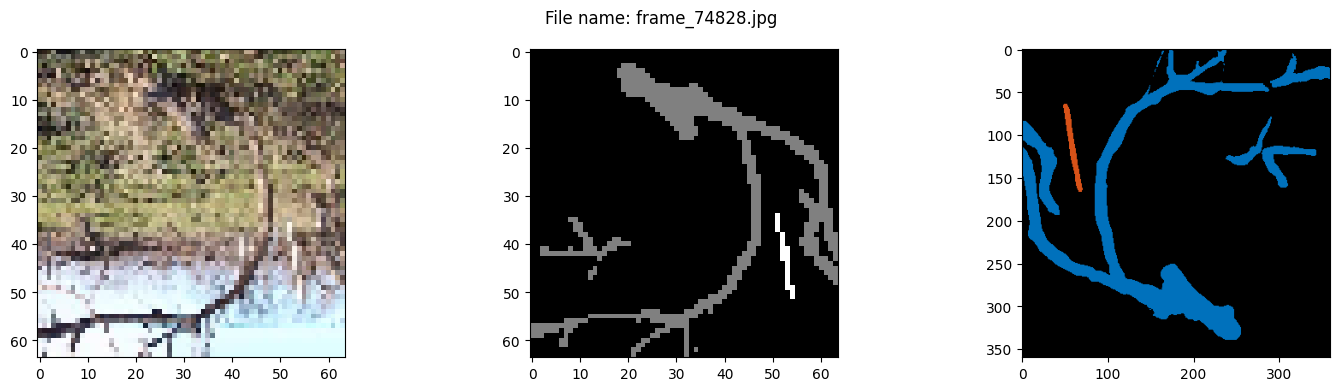

In [83]:
rand_num = np.random.randint(len(dataset))
image, mask = dataset[rand_num]

print(f'Size of the dataset: {len(dataset)}')
print(f'Shape of Image: {image.shape} and mask: {mask.shape}')
print(f'Classes in the mask images: {np.unique(mask)}')
print('\nPlotting the data:')

filename = dataset.image_list[rand_num]
maskname = dataset.mask_list[rand_num]
plt.figure(figsize=(18, 4))
plt.suptitle(f'File name: {filename}')
plt.subplot(131)
plt.imshow(image.permute(1,2,0))
plt.subplot(132)
plt.imshow(mask, 'gray')
plt.subplot(133)
plt.imshow(plt.imread(os.path.join(dataset.dataset_dir, maskname)))

# 6. –°–æ–∑–¥–∞–¥–∏–º DataLoader

In [19]:
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = False)

print(f"–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–∞—Ç—á–µ–π –≤ Train Loader: {len(train_dataloader)}")
print(f"–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–∞—Ç—á–µ–π –≤ in Val Loader: {len(val_dataloader)}")
print(f"–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–∞—Ç—á–µ–π –≤ in Test Loader: {len(test_dataloader)}")

–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–∞—Ç—á–µ–π –≤ Train Loader: 7
–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–∞—Ç—á–µ–π –≤ in Val Loader: 2
–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–∞—Ç—á–µ–π –≤ in Test Loader: 1


In [20]:
for image, mask in train_dataloader:
    print(f"Size of one batch of images: {image.shape}")
    print(f"Size of one batch of masks: {mask.shape}")
    break

Size of one batch of images: torch.Size([32, 3, 64, 64])
Size of one batch of masks: torch.Size([32, 64, 64])


# 7. –°–æ–∑–¥–∞–¥–∏–º –Ω–∞—à—É Unet –º–æ–¥–µ–ª—å

–ú–æ–¥–µ–ª—å –∏–º–µ–µ—Ç —Ç–∞–∫–æ–µ –∂–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ, –∫–∞–∫ —É–∫–∞–∑–∞–Ω–æ –≤ –Ω–∞–∑–≤–∞–Ω–∏–∏. –ú–æ–¥–µ–ª—å U-–æ–±—Ä–∞–∑–Ω–æ–π —Ñ–æ—Ä–º—ã. –ü—Ä–∏—á–∏–Ω–∞ U-–æ–±—Ä–∞–∑–Ω–æ–π —Ñ–æ—Ä–º—ã –∫—Ä–æ–µ—Ç—Å—è –≤ —Ä–∞–±–æ—Ç–µ –º–æ–¥–µ–ª–∏, –º–æ–¥–µ–ª—å –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è —Å –ª–µ–≤–æ–π —Å—Ç–æ—Ä–æ–Ω—ã –∏ –¥–≤–∏–∂–µ—Ç—Å—è –∫ —Ü–µ–Ω—Ç—Ä—É, —Å–∂–∏–º–∞—è –¥–∞–Ω–Ω—ã–µ –∏ —Å–æ—Ö—Ä–∞–Ω—è—è —Ç–æ–ª—å–∫–æ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, —ç—Ç–∞ —á–∞—Å—Ç—å –º–æ–¥–µ–ª–∏ –¥–∞–∂–µ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–æ–º. –ó–∞—Ç–µ–º –¥–∞–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ—â–∞—é—Ç—Å—è –≤ –ø—Ä–∞–≤—ã–π —É–≥–æ–ª, –≥–¥–µ –¥–∞–Ω–Ω—ã–µ —Ä–µ–∫–æ–Ω—Å—Ç—Ä—É–∏—Ä—É—é—Ç—Å—è —Å–æ –≤—Å–µ–º–∏ –∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∏ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç—Å—è –≤ –≤–∏–¥–µ –º–∞—Å–∫–∏, —ç—Ç–∞ —á–∞—Å—Ç—å –º–æ–¥–µ–ª–∏ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è –¥–µ–∫–æ–¥–µ—Ä–æ–º.

![UNet++ architecture](https://pic.imgdb.cn/item/60dac54e5132923bf81d4a25.jpg)

I will now create the Segmentation model using the Unet++ architecture. The parameters used for the model are:
- **Efficient Net** is used as the encoder model
- Weights used are of **Imagenet**
- Input channels are 3 due to **RGB** images

In the forward method I defined the loss functions. DiceLoss and Binary Cross Entropy are used as loss functions for this task.

[Dice loss](https://serp.ai/dice-loss/#:~:text=Dice%20Loss%20is%20an%20important,true%20segmentation%20of%20an%20image.) is a metric commonly used to evaluate the performance of machine learning models in image segmentation tasks. It is a measure of the dissimilarity between the predicted segmentation (mask) and the true segmentation of an image.

### DoubleConvLayer

In [21]:
class DoubleConvLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            # First convolution layer
            nn.Conv2d(in_channels=in_channels,
                      out_channels=out_channels,
                      kernel_size=3,
                      stride=1,
                      padding=1,
                      bias=False),
            nn.BatchNorm2d(num_features=out_channels),
            nn.ReLU(inplace=True),

            # Second convolution layer
            nn.Conv2d(in_channels=out_channels,
                      out_channels=out_channels,
                      kernel_size=3,
                      stride=1,
                      padding=1,
                      bias=False),
            nn.BatchNorm2d(num_features=out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

## 7.1. –ù–∞–ø–∏—à–µ–º Encoder
–ü—É—Ç—å –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏ –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ –Ω–∞—á–∏–Ω–∞–µ—Ç –≤—ã–ø–æ–ª–Ω—è—Ç—å –º–µ—Ç–æ–¥ –ø–æ–Ω–∏–∂–∞—é—â–µ–π –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü–∏–∏, —ç—Ç–æ –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è —Å –ø–æ–º–æ—â—å—é —Å–≤–µ—Ä—Ç–∫–∏ –∏ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è —Å–ª–æ–µ–≤.

–ï—Å–ª–∏ –≤—ã –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É, —Ç–æ –º–æ–∂–µ—Ç–µ –∑–∞–º–µ—Ç–∏—Ç—å –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å: –≤—Å–µ —Å–ª–æ–∏ –ø–æ–Ω–∏–∂–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ –∏–º–µ—é—Ç –¥–≤–∞ —Å–ª–æ—è —Å–≤–µ—Ä—Ç–∫–∏. –º—ã —Å–æ–∑–¥–∞–¥–∏–º –∫–ª–∞—Å—Å torch.nn.Module, –∏–º–µ—é—â–∏–π –¥–≤–∞ —Å–ª–æ—è —Å–≤–µ—Ä—Ç–∫–∏. –ü—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ —Å–ª–æ–µ–≤ —Å–≤–µ—Ä—Ç–∫–∏ –º—ã –Ω–µ –±—É–¥–µ–º –∏–∑–º–µ–Ω—è—Ç—å –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ –∏–∑–º–µ—Ä–µ–Ω–∏–µ, –ø—Ä–∏–º–µ–Ω—è—è –æ—Ç—Å—Ç—É–ø—ã –∏ –≤–º–µ—Å—Ç–µ —Å–æ —Å–≤–µ—Ä—Ç–∫–æ–π –ø–∞–∫–µ—Ç–Ω—É—é –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é –¥–ª—è —Å–º–µ—â–µ–Ω–∏—è –∏ –∞–∫—Ç–∏–≤–∞—Ü–∏—é ReLU, —á—Ç–æ–±—ã —Å–¥–µ–ª–∞—Ç—å –µ–≥–æ –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–º.

### DownSampling

In [22]:
class DownSampling(nn.Module):
    """
    This class implements the downsampling part of the architecture.
    If you check the architecture dig., the left path displays the red arrow
    indicating the downsampled layer using the max pool.
    """
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.down_sample = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Initializing the layer using the double convolution layer class
            DoubleConvLayer(in_channels=in_channels,
                            out_channels=out_channels)
        )

    def forward(self, x):
        return self.down_sample(x)

> –ü—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –ø–æ–Ω–∏–∂–∞—é—â–µ–π –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü–∏–∏ –º–æ–¥–µ–ª—å –∏–∑—É—á–∞–µ—Ç –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, –Ω–æ —Ç–∞–∫–∂–µ —Ç–µ—Ä—è–µ—Ç –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é. –ò—Ç–∞–∫, —á—Ç–æ–±—ã –≤–µ—Ä–Ω—É—Ç—å –ø–æ—Ç–µ—Ä—è–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, –Ω–∞–º –Ω—É–∂–Ω–æ –≤—ã–ø–æ–ª–Ω–∏—Ç—å –¥–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–æ—Å–ª–µ —ç—Ç–æ–≥–æ.

## 7.2. Decoder(Expansion Path)

### UpSampling

In [23]:
class UpSampling(nn.Module):
    """
    This class implements the upsampling part of the architecture.
    If you check the architecture dig., the right path displays the green arrow
    indicating the upsampled layer.
    """
    def __init__(self, in_channels, out_channels):
        super().__init__()
        # Using Transposed convolution for upsampling
        self.up_sample = nn.ConvTranspose2d(in_channels=in_channels,
                                            out_channels=out_channels,
                                            kernel_size=2,
                                            stride=2)
        self.double_conv = DoubleConvLayer(in_channels=in_channels,
                                           out_channels=out_channels)

    def forward(self, x1, x2):
        """
        x1 is the output tensor of the previous layer, which will be upsampled.
        x2 is the skip connection tensor that was generated during
        downsampling.
        """
        x1 = self.up_sample(x1)

        # Correcting the shape after upsampling
        if x1.shape != x2.shape:
            x1 = TF.resize(img=x1, size=x2.shape[2:], antialias=True)

        x = torch.cat((x2, x1), 1)
        return self.double_conv(x)

## 7.3. Complete U-Net Architecture

–¢–µ–ø–µ—Ä—å, –∫–æ–≥–¥–∞ –º—ã —Å–æ–∑–¥–∞–ª–∏ –∫–∞–∫ –ø–æ–Ω–∏–∂–∞—é—â—É—é, —Ç–∞–∫ –∏ –ø–æ–≤—ã—à–∞—é—â—É—é –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü–∏—é –º–æ–¥–µ–ª–∏, –º—ã –º–æ–∂–µ–º –∑–∞–≤–µ—Ä—à–∏—Ç—å –º–æ–¥–µ–ª—å, —Å–æ–±—Ä–∞–≤ –∫—É—Å–æ—á–∫–∏ –∏ –∑–∞–≤–µ—Ä—à–∏–≤ –≥–æ–ª–æ–≤–æ–ª–æ–º–∫—É.

–ú—ã –Ω–∞—á–∏–Ω–∞–µ–º —Å –ø–æ–Ω–∏–∂–∞—é—â–µ–π –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü–∏–∏ –¥–ª—è 4 —Å–ª–æ–µ–≤ (–≤–∫–ª—é—á–∞—è –≤—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π), –∫–∞–∂–¥—ã–π —Å–ª–æ–π —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –æ–±—ä–µ–∫—Ç—ã –≤ 2 —Ä–∞–∑–∞ –∏ —É–º–µ–Ω—å—à–∞–µ—Ç –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—ã–π —Ä–∞–∑–º–µ—Ä –≤ 2 —Ä–∞–∑–∞.
–ó–∞—Ç–µ–º –º—ã —Å–æ–∑–¥–∞–µ–º –Ω–∏–∂–Ω–∏–π —Å–ª–æ–π —Å–≤–µ—Ä—Ç–∫–∏, –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á–µ–Ω —Ç–æ–ª—å–∫–æ –¥–ª—è –ø–µ—Ä–µ–¥–∞—á–∏ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —ç—Ç–∞–ø –ø–æ–≤—ã—à–µ–Ω–∏—è –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü–∏–∏.
–ö–∞–∫ —Ç–æ–ª—å–∫–æ –º—ã –ø–æ–ª—É—á–∞–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∏–∂–Ω–µ–≥–æ —É—Ä–æ–≤–Ω—è, –æ–Ω –ø–µ—Ä–µ—Ö–æ–¥–∏—Ç –∫ –ø–æ–≤—ã—à–µ–Ω–∏—é –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü–∏–∏, –∞ —Ç–∞–∫–∂–µ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ –æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω–æ–º —Å–æ–µ–¥–∏–Ω–µ–Ω–∏–∏ –∏–∑ –ø–æ–Ω–∏–∂–∞—é—â–µ–π –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü–∏–∏ –∏ –ø–µ—Ä–µ–º–µ—â–∞–µ—Ç—Å—è –¥–æ 4 —É—Ä–æ–≤–Ω–µ–π.
–ù–∞–∫–æ–Ω–µ—Ü, –¥–æ—Å—Ç–∏–≥–∞—è –ø–æ—Å–ª–µ–¥–Ω–∏—Ö —Å–ª–æ–µ–≤, –¥–∞–Ω–Ω—ã–µ –ø—Ä–æ—Ö–æ–¥—è—Ç —á–µ—Ä–µ–∑ –ø–æ—Å–ª–µ–¥–Ω–∏–π —Å–ª–æ–π, –≥–¥–µ –¥–∞–Ω–Ω—ã–µ –æ–±—ä–µ–∫—Ç–æ–≤ —Å–≤–µ—Ä–Ω—É—Ç—ã –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –æ–±—â–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –∫–ª–∞—Å—Å–æ–≤ –∏ —Ñ–æ—Ä–º–∏—Ä—É—é—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –∏—Å—Ö–æ–¥–Ω–æ–π —Ñ–æ—Ä–º–æ–π.

In [24]:
class UnetModel(nn.Module):
    def __init__(self,
                 n_classes: int,
                 in_channels=3):
        super().__init__()
        features = [64, 128, 256]
        self.encoder = nn.ModuleList()
        self.decoder = nn.ModuleList()
        self.skip_connection = []

        # The input layer of the model [BCHW]
        # Eg. input tensor shape: [1, 3, 572, 572]
        self.encoder.append(DoubleConvLayer(in_channels=in_channels,
                                            out_channels=features[0]))
        # Eg. output tensor shape: [1, 64, 572, 572]

        # A 3 layer downsampling
        # Eg. input tensor shape: [1, 64, 572, 572]
        for feature in features:
            self.encoder.append(DownSampling(in_channels=feature,
                                             out_channels=feature * 2))
        # Eg. output tensor shape: [1, 512, 71, 71]

        # Bottom layer of the UNet Model
        # Eg. input tensor shape: [1, 512, 71, 71]
        self.bottom_layer = DownSampling(in_channels=features[-1]*2,
                                         out_channels=features[-1]*4)
        # Eg. output tensor shape: [1, 1024, 35, 35]

        # A 3-layer upsampling
        # Eg. input tensor shape: [1, 1024, 35, 35]
        for feature in reversed(features):
            self.decoder.append(UpSampling(in_channels=feature * 4,
                                           out_channels=feature * 2))
        # Eg. output tensor shape: [1, 128, 286, 286]

        # Upsampling before the final layer
        # Eg. input tensor shape: [1, 128, 286, 286]
        self.decoder.append(UpSampling(in_channels=features[1],
                                       out_channels=features[0]))
        # Eg. output tensor shape: [1, 64, 572, 572]

        # Final layer of the model, giving the predicted mask
        # Eg. input tensor shape: [1, 64, 572, 572]
        self.final_layer = nn.Conv2d(in_channels=features[0],
                                     out_channels=n_classes,
                                     kernel_size=1)
        # Eg. output tensor shape: [1, n_classes, 572, 572]

    def forward(self, x):
        for encode in self.encoder:
            x = encode(x)
            # Appending all the downsampled output for skip connection
            self.skip_connection.append(x)

        x = self.bottom_layer(x)

        for decode, skip in zip(self.decoder,
                                reversed(self.skip_connection)):
            # Upsampling using the skip connection that was collected durning downsampling
            x = decode(x, skip)

        return self.final_layer(x)

## 7.4. –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–∏

In [25]:
# Performing a unit test to check whether the model works or not
#x = torch.randn((3, 3, 224, 224))
#model = UnetModel(n_classes=3, in_channels=3)
#output = model(x)
#assert x.shape[2:] == output.shape[2:]
#print(f'Input shape: {x.shape} and output shape: {output.shape}')

### Summary of the model

In [26]:
#summary(model=UnetModel(n_classes=5),
#        input_size=(1, 3, 224, 224),
#        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
#        col_width=20,
#        row_settings=['var_names'])

In [27]:
# Visualizing the model
#model_graph = draw_graph(UnetModel(5), input_size=(1,3,224,224), expand_nested=True)
#model_graph.visual_graph

# 9. Create Train and Validation Function
# Writing the training and testing step function

### train_step

In [28]:
# Writing the training step function
def train_step(model, dataloader, loss_fn, optimizer, num_classes, device):

    model.train()

    train_loss = 0
    #train_iou = torchmetrics.IoU(num_classes=num_classes)
    #train_dice = torchmetrics.Dice(num_classes=num_classes)
    train_accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=num_classes).to(device)

    for batch, (images, masks) in enumerate(dataloader):
        images = images.float().to(device=device)
        masks = masks.float().to(device=device).long()

        # forward pass...
        pred_masks = model(images)

        # calculate loss
        loss = loss_fn(pred_masks, masks)
        train_loss += loss.item()

        # optimizer zero grad
        optimizer.zero_grad()

        # loss backward
        loss.backward()

        # optimizer step
        optimizer.step()

        # Update IoU metric
        pred_labels = torch.argmax(pred_masks, dim=1)
        #train_iou.update(pred_labels, masks)
        #train_dice.update(pred_labels, masks)
        train_accuracy.update(pred_labels, masks)

    #
    train_loss = train_loss / len(dataloader)
    train_accuracy /= len(dataloader)
    #train_iou_mean /= len(dataloader)
    #train_dice_mean /= len(dataloader)
    torch.cuda.empty_cache()
    gc.collect()

    return (train_loss, train_accuracy) #, train_iou_mean, train_dice_mean)

### test_step

In [29]:
# Writing the testing step function
def test_step(model, dataloader, loss_fn, num_classes, device):

    model.eval()

    test_loss = 0
    #test_iou = torchmetrics.IoU(num_classes=num_classes)
    #test_dice = torchmetrics.Dice(num_classes=num_classes)
    test_accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=num_classes).to(device)
    with torch.inference_mode():
        for batch, (images, masks) in enumerate(dataloader):
            images = images.float().to(device=device)
            masks = masks.float().to(device=device).long()

            # forward pass...
            pred_masks = model(images)

            # calculate loss
            loss = loss_fn(pred_masks, masks)
            test_loss += loss.item()

            # Update IoU metric
            pred_labels = torch.argmax(pred_masks, dim=1)
            #test_iou.update(pred_labels, masks)
            #test_dice.update(pred_labels, masks)
            test_accuracy.update(pred_labels, masks)

    #
    test_loss = test_loss / len(dataloader)
    test_accuracy /= len(dataloader)
    #test_iou_mean /= len(dataloader)
    #test_dice_mean /= len(dataloader)
    torch.cuda.empty_cache()
    gc.collect()

    return (test_loss, test_accuracy) #, test_iou_mean, test_dice_mean)

### Function to train the model using the above train and test steps

In [30]:
def model_training(model,
                   train_dataloader,
                   test_dataloader,
                   loss_fn,
                   optimizer,
                   device,
                   num_classes: int = 3,
                   epochs: int = 5):

    # –°–æ–∑–¥–∞–¥–∏–º —Å–ª–æ–≤–∞—Ä—å –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –≤—Å–µ—Ö –Ω–∞—à–∏—Ö –º–µ—Ç—Ä–∏–∫
    results = {'train_loss': [],
               'train_acc': [],
               #'train_iou_mean': [],
               #'train_dice_mean': [],

               'test_loss': [],
               'test_acc': [],
               #'test_iou_mean': [],
               #'test_dice_mean': []
              }

    # Train and eval/test loop
    for epoch in tqdm(range(epochs)):
        # Model training
        (train_loss, train_acc
         #, train_iou_mean, train_dice_mean
        ) = train_step(model=model,
                       dataloader=train_dataloader,
                       loss_fn=loss_fn,
                       optimizer=optimizer,
                       num_classes=num_classes,
                       device=device)

        # Model testing
        (test_loss, test_acc
        #, test_iou_mean, test_dice_mean
        ) = test_step(model=model,
                    dataloader=test_dataloader,
                    loss_fn=loss_fn,
                    num_classes=num_classes,
                    device=device)

        print(f'Epoch: {epoch + 1} | Train Loss: {train_loss:.3f}, Train Accuracy: {train_acc}|')
        print(f'Epoch: {epoch + 1} | Test Loss: {test_loss:.3f}, Test Accuracy: {test_acc}|')

        # Storing every epoch result in the the resultdict.
        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        # results['train_iou_mean'].append(train_iou_mean)
        #results['train_dice_mean'].append(train_dice_mean)

        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)
        # results['test_iou_mean'].append(test_iou_mean)
        # results['test_dice_mean'].append(test_dice_mean)

        torch.cuda.empty_cache()
        gc.collect()

    return results

Before training the model make sure that your GPU is running because it would take eternity to train the model on a CPU.

# Model Training

In [35]:
torch.cuda.empty_cache()
gc.collect()

0

In [ ]:
# Set random seeds
#torch.manual_seed(42)
#torch.cuda.manual_seed(42)

model = UnetModel(n_classes=3 ).to(DEVICE)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model
model_results = model_training(model=model,
                      train_dataloader=train_dataloader,
                      test_dataloader=val_dataloader,
                      loss_fn=loss_fn,
                      optimizer=optimizer,
                      device = DEVICE,
                      num_classes = 3,
                      epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

In [36]:
gc.collect()

19

In [33]:
model_results['train_acc'][0]

CompositionalMetric(
  true_divide(
    MulticlassAccuracy(),
    7
  )
)

In only 10 epochs the model reduced the validation loss to close to 0.2 which is very good. THis shows the power of the Unet architecture on Image segmentation preoblems. Now let's see how our model predictions look in comparison to the original masks.

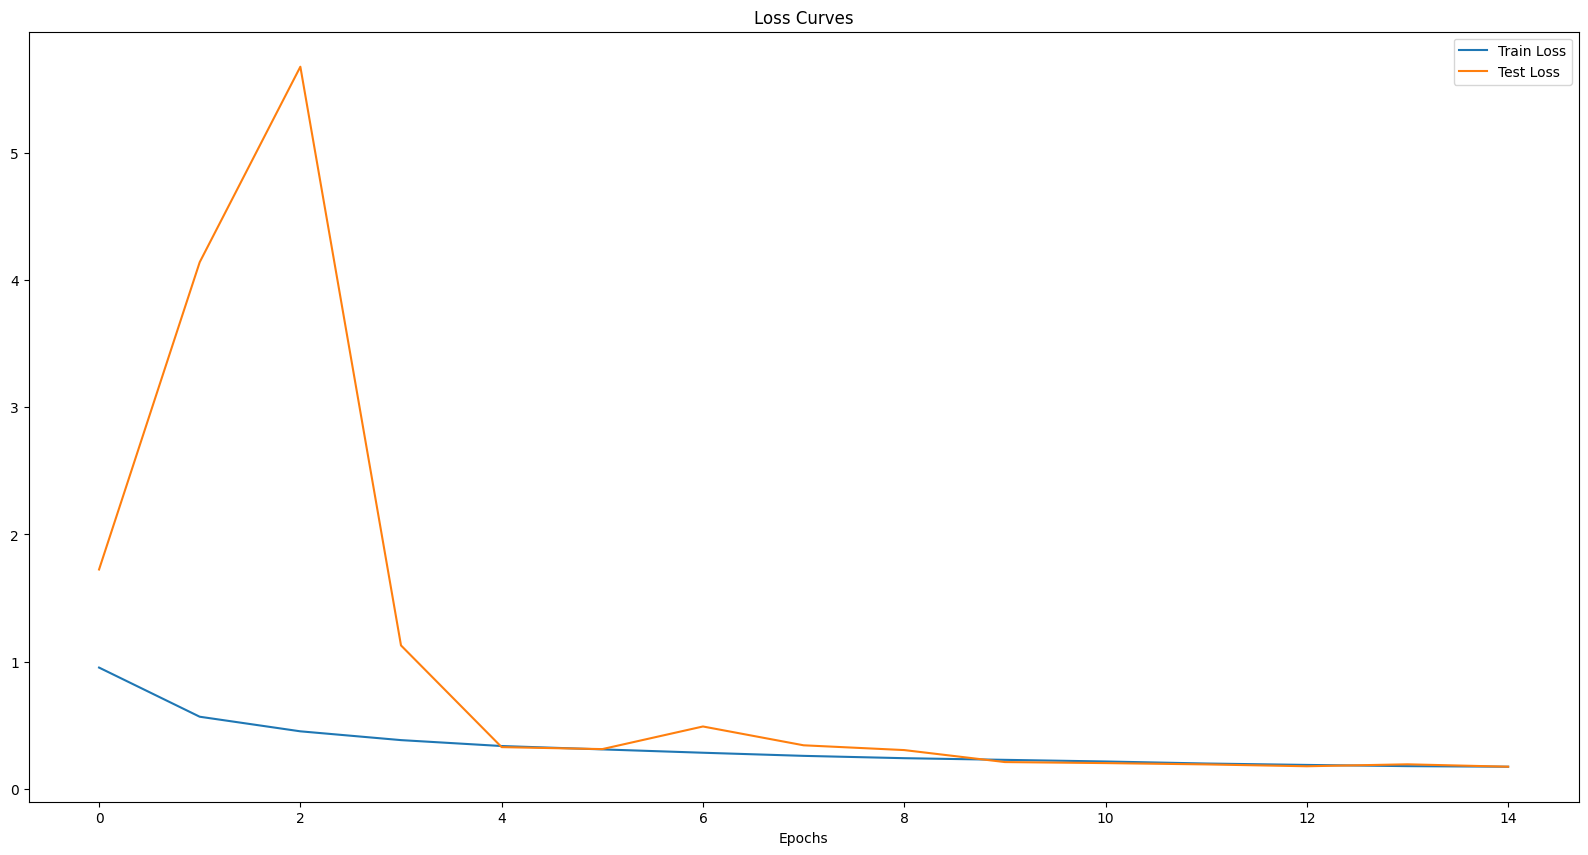

In [34]:
def plot_performance_metrics(model_result: dict):
    """
    Plot the performance metrics from training and testing the model.
    Parameters:
        model_result: A dict containing all the metrics.
    """

    '''
    # Plotting loss curves
    plt.subplot(2, 2, 1)
    plt.plot(epochs, model_result['train_loss'], label='Train Loss')
    plt.plot(epochs, model_result['test_loss'], label='Test Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epochs')
    plt.legend()

    # Plotting loss curves
    plt.subplot(2, 2, 2)
    plt.plot(epochs, model_result['train_acc'], label='Train Accuracy')
    plt.plot(epochs, model_result['test_acc'], label='Test Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epochs')
    plt.legend()

    # Plotting loss curves
    plt.subplot(2, 2, 3)
    plt.plot(epochs, model_result['train_iou_mean'], label='Train IoU')
    plt.plot(epochs, model_result['test_iou_mean'], label='Test IoU')
    plt.title('Mean IoU Curves')
    plt.xlabel('Epochs')
    plt.legend()

    # Plotting loss curves
    plt.subplot(2, 2, 4)
    plt.plot(epochs, model_result['train_dice_mean'], label='Train DICE')
    plt.plot(epochs, model_result['test_dice_mean'], label='Test DICE')
    plt.title('Mean DICE Curves')
    plt.xlabel('Epochs')
    plt.legend();
    '''
    epochs = range(len(model_result['train_loss']))
    plt.figure(figsize=(20,10))

    # Plotting loss curves
    plt.subplot(1, 1, 1)
    plt.plot(epochs, model_result['train_loss'], label='Train Loss')
    plt.plot(epochs, model_result['test_loss'], label='Test Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epochs')
    plt.legend()


plot_performance_metrics(model_result=model_results)

# Inference

### onehot_to_rgbmask

In [103]:
# Creating function to convert onehot prediction into an image
def onehot_to_rgbmask(onehot_mask: np.ndarray,
                      colormap: list,
                      save_mask: bool = False,
                      filename: str = 'mask.png',
                      verbose: bool = True):
        """
        Converts a onehot encoded mask into RGB mask.
        Parameters:
            onehot_mask: A array containing the mask in onehot encoded format
                         with shape (batch, classes, height, width).
            colormap: A list with all the RGB colors for every single class
                      in proper sequence.
            save_mask: A boolean to save the RGB mask into an image file.
            filename: A string for the filename of the RGB Mask.
            verbose: A boolean to display additional text details.
        Returns:
            output: A array that is converted from onehot mask to RGB mask in
                    shape HWC.
        """
        onehot_mask = np.array(onehot_mask)
        assert len(onehot_mask.shape) == 4 # Shape of the mask
        assert onehot_mask.shape[0] == 1 # One image in a batch
        assert len(colormap) == onehot_mask.shape[1] # Total number of classes

        # Getting the class with the highest probability
        onehot_mask = np.argmax(onehot_mask, axis=1)

        # Creating a array to fill the output
        output = np.zeros(onehot_mask.shape[1:] + (3,))

        # Changing the dimension to (HWC)
        onehot_mask = np.transpose(onehot_mask, (1, 2, 0))

        for label, color in enumerate(colormap):
            if label < len(colormap):
                # Matching the onehot label with the class label
                # Then replacing the values with the RGB color values.
                output[np.all(np.equal(onehot_mask, label), axis=-1)] = color

        output = output.astype(np.uint8)

        if save_mask:
            mask_img = Image.fromarray(output)
            mask_img.save(filename)

        if save_mask and verbose:
            print('[INFO] Onehot encoded mask has been converted into RGB mask.')
            print(f'[INFO] RGB mask is been saved to the location: "{filename}".')
        elif verbose:
            print('[INFO] Onehot encoded mask has been converted into RGB mask.')

        return output

### predict_and_save

In [44]:
def predict_and_save(model: torch.nn.Module,
                     pred_transform,
                     data_path: str,
                     file_ext: str,
                     colormap: list,
                     device: torch.device,
                     save_pred: bool = True,
                     save_dir: str = 'pred_result/',
                     verbose: bool = False):
    """
    Performs prediction and saves the prediction on a image or all the images in
    a directory.
    Parameters:
        model: A pytorch model for prediction.
        pred_transform: A transformation method to be used for modifying the
                        dataset before prediction.
        data_path: A image file path or a directory path with all the images
        file_ext: Extension of image file needs to be 'png' or 'jpg'.
        colormap: A list containing the classes to RGB color mapped in order.
        device: A pytorch device to set the model and data into cpu or cuda.
        save_pred: A boolean to whether save the predicted mask as a image file.
        save_dir: A string for the directory path to save the image file.
        verbose: A boolean for displaying information for all the files.
    Returns:
        A array containing all the predicted mask in shape BHWC
    """
    # Checking the data path is a file or dir
    if os.path.isdir(data_path):
        if file_ext in ['PNG', 'png', 'JPG', 'jpg']:
            filepath_list = glob.glob(os.path.join(data_path,
                                                   '*.' + file_ext.lower()))
        else:
            raise Exception('[ERROR] Check your file ext it should be either  \
                             "png" or "jpg".')
    elif os.path.isfile(data_path):
        filepath_list = [data_path]
    else:
        raise Exception('[ERROR] Only file or directory is allowed for data path.')

    pred_mask = []

    for fpath in tqdm(filepath_list):
        # Reading and transforming the image
        image = cv2.cvtColor(cv2.imread(fpath), cv2.COLOR_BGR2RGB)
        aug = pred_transform(image=image)
        image = aug['image'] #.unsqueeze(0).to(device)
        image = torch.from_numpy(image)
        image = image.permute(2,1,0).unsqueeze(0).float().to(device)
        print(image.shape)
        # Predicting using the model
        model.eval()
        with torch.inference_mode():
            pred = torch.softmax(model(image), 1)

            assert len(colormap) == pred.shape[1] # Checking classes size
            if not os.path.exists(save_dir): # Checking save dir
                os.makedirs(save_dir)
            pred_fname = os.path.join(save_dir, 'pred_' + fpath.split('/')[-1] \
                                                .split('.')[0] + '.png')

            # Converting the prediction into RGB mask and saving the mask
            pred_mask.append(onehot_to_rgbmask(onehot_mask=pred.cpu().detach().numpy(),
                                               colormap=colormap,
                                               save_mask=save_pred,
                                               filename=pred_fname,
                                               verbose=verbose))
    if save_pred and not verbose:
        print(f'[INFO] All the prediction is been saved to location: "{save_dir}"')

    return np.asarray(pred_mask)

## Predicting all the val/test set and saving the prediction

In [38]:
def predict_and_save(model: torch.nn.Module,
                     pred_transform,
                     data_path: str,
                     file_ext: str,
                     colormap: list,
                     device: torch.device,
                     save_pred: bool = True,
                     save_dir: str = 'pred_result/',
                     verbose: bool = False):
    # Checking the data path is a file or dir
    if os.path.isdir(data_path):
        if file_ext in ['PNG', 'png', 'JPG', 'jpg']:
            filepath_list = glob.glob(os.path.join(data_path,
                                                   '*.' + file_ext.lower()))
        else:
            raise Exception('[ERROR] Check your file ext it should be either  \
                             "png" or "jpg".')
    elif os.path.isfile(data_path):
        filepath_list = [data_path]
    else:
        raise Exception('[ERROR] Only file or directory is allowed for data path.')

    pred_mask = []

    for fpath in tqdm(filepath_list):
        # Reading and transforming the image
        image = cv2.cvtColor(cv2.imread(fpath), cv2.COLOR_BGR2RGB)
        aug = pred_transform(image=image)
        image = aug['image'] #.unsqueeze(0).to(device)
        image = torch.from_numpy(image)
        image = image.permute(2,1,0).unsqueeze(0).float().to(device)
        # Predicting using the model
        model.eval()
        with torch.inference_mode():
            pred = torch.softmax(model(image), 1)
            pred_binary = torch.argmax(pred, dim=1)
            # print(len(pred_binary))
            #assert len(colormap) == pred.shape[1] # Checking classes size

        onehot_mask = pred_binary.cpu().detach().numpy()
        # Creating a array to fill the output
        output = np.zeros(onehot_mask.shape[1:] + (3,))
        # Changing the dimension to (HWC)
        onehot_mask = np.transpose(onehot_mask, (1, 2, 0))

        for label, color in enumerate(colormap):
            if label < len(colormap):
                output[np.all(np.equal(onehot_mask, label), axis=-1)] = color
        #print(output)

        output = output.astype(np.uint8)
        output = Image.fromarray(output)
        pred_mask.append(output)

    return pred_mask

# Predicting all the val/test set and saving the prediction
pred_result = predict_and_save(model=model,
                               pred_transform=aug_transform,
                               data_path=TEST_DIR,
                               file_ext='jpg',
                               colormap=test_dataset.colormap,
                               device=DEVICE)


  0%|          | 0/30 [00:00<?, ?it/s]

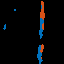

In [39]:
pred_result[0]

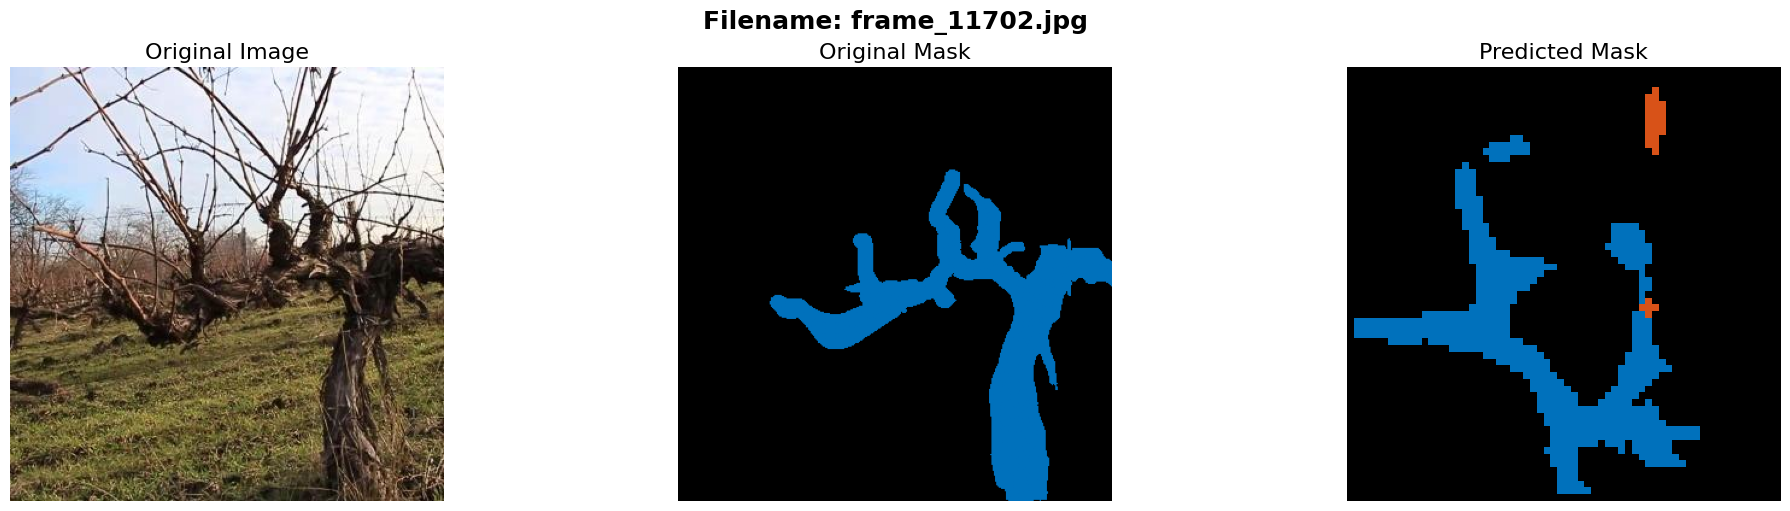

In [46]:
# Randomly comparing validation/testing images, masks and predicted masks
rand_num = np.random.randint(len(test_dataset))
image, mask = test_dataset[rand_num]

rand_image_sample = test_dataset.image_list[rand_num] # –ó–¥–µ—Å—å –Ω–∞–¥–æ –ø–æ–ª—É—á–∏—Ç—å –µ—â–µ –∏ –Ω–æ–º–µ—Ä –∏–∑–±—Ä–∞–∂–µ–Ω–∏—è –≤ —Å–ø–∏—Å–∫–µ
rand_mask_sample = test_dataset.mask_list[rand_num]

plt.figure(figsize=(20, 5), layout='constrained')

plt.suptitle(f'Filename: {rand_image_sample}', fontweight='bold', fontsize=18)
plt.subplot(1, 3, 1)
image = plt.imread(os.path.join(test_dataset.dataset_dir, rand_image_sample))
plt.imshow(image)
plt.title('Original Image', fontsize=16)
plt.axis(False)


plt.subplot(1, 3, 2)
mask = plt.imread(os.path.join(test_dataset.dataset_dir, rand_mask_sample))
plt.imshow(mask)
plt.title('Original Mask', fontsize=16)
plt.axis(False)

plt.subplot(1, 3, 3)
#image = plt.imread()
plt.imshow(pred_result[rand_num])
plt.title('Predicted Mask', fontsize=16)
plt.axis(False);

In [ ]:
# Load best model
model.load_state_dict(torch.load("best_model.pt"))

# Function to output the prediction mask
def make_inference(idx):
    image, mask = test_data_custom[idx]
    logits_mask = model(image.to(DEVICE).unsqueeze(0)) # (C, H, W) -> (1, C, H, W)

    # Predicted mask
    pred_mask = torch.sigmoid(logits_mask)
    pred_mask = (pred_mask > 0.5) * 1.0

    return image, mask, pred_mask

FileNotFoundError: [Errno 2] No such file or directory: 'best_model.pt'

In [ ]:
# Compare predictions with original
for i in np.random.randint(0, len(test_data_custom), 5):
    image, mask, pred_mask = make_inference(i)

    # Show image
    plt.figure(figsize=(10,3))
    plt.subplot(1,3,1)
    plt.imshow(np.transpose(image, (1,2,0)))
    plt.axis('off')
    plt.title('IMAGE');

    # Show original mask
    plt.subplot(1,3,2)
    plt.imshow(np.transpose(mask, (1,2,0)), cmap='gray')
    plt.axis('off')
    plt.title('GROUND TRUTH');

    # Show predicted mask
    plt.subplot(1,3,3)
    plt.imshow(np.transpose(pred_mask.detach().cpu().squeeze(0), (1,2,0)), cmap='gray')
    plt.axis('off')
    plt.title('PREDICTION');

The model performs fairly decent but there is still room for improvement. To further improve the performance the below mentioned steps can be

**Steps to improve the model performance:**
- Try running the model for more epochs
- Try using different model architectures
- Try using different encoder models
- Try using more efficient methods such as early stopping to prevent overfitting
- Try using differnt learning rate schedulers to reduce learning rate near convergence region.

**Consider giving an upvoteüëç if you liked the notebook. It will help it to reach a wider audience.**

**It would be highly appreciated if you can take out some time to share your views on what you liked in the notebook and what can be the potential improvements that can be made to further improve the notebook.**

**Thanks**

# References

- **Notebook inspired from this project**: https://www.coursera.org/projects/deep-learning-with-pytorch-image-segmentation
- **Image Segmentation**: https://www.ibm.com/topics/image-segmentation
- **albumentations documentation**: https://albumentations.ai/docs/
- **segmentation_models_pytorch documentation**: https://smp.readthedocs.io/en/latest/
- **Unet++ original paper**: https://arxiv.org/abs/1807.10165
- **Dice Loss**: https://serp.ai/dice-loss/#:~:text=Dice%20Loss%20is%20an%20important,true%20segmentation%20of%20an%20image.

In [ ]:
torch.cuda.empty_cache()